In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

def rotation2D(theta, x):
    """ x: 2D array"""
    import math
    R = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])
    return R @ x

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

    

Text(0.5, 1.0, 'XOR data')

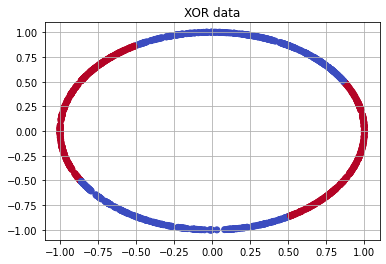

In [2]:
# XOR data
num_data = 1000
num_test = 100
XOR_X = 2*np.random.rand(num_data, 2)-1
XOR_X = np.array([x/np.linalg.norm(x) for x in XOR_X])
XOR_rot_y = np.array([np.sign(x[0])*np.sign(x[1]) for x in rotation2D(np.pi/3, XOR_X.T).T])
XOR_Xtest = 2*np.random.rand(num_test, 2)-1
XOR_rot_ytest = np.array([np.sign(x[0])*np.sign(x[1]) for x in rotation2D(np.pi/3, XOR_Xtest.T).T])
plt.scatter(XOR_X[:,0], XOR_X[:,1], c=XOR_rot_y, cmap=plt.cm.coolwarm)
plt.grid()
plt.title('XOR data')

In [3]:
C = 1e1
X = XOR_X
y = XOR_rot_y
Y = np.array([y]).T
Q = matrix(Y @ Y.T * np.abs(X @ X.T)**2)
p = matrix(-np.ones(y.size))
G = matrix(np.vstack([-np.identity(y.size), np.identity(y.size)]))

h = matrix(np.hstack([np.zeros(y.shape), C*np.ones(y.shape)]))

sol = solvers.qp(Q, p, G, h)

pcost       dcost       gap    pres   dres
 0: -9.1394e+02 -3.7060e+04  8e+04  4e-01  3e-14
 1: -3.1465e+02 -5.1046e+03  8e+03  4e-02  3e-14
 2: -1.7055e+02 -1.2752e+03  2e+03  6e-03  3e-14
 3: -3.3864e+02 -7.1317e+02  5e+02  1e-03  2e-14
 4: -3.7864e+02 -6.3817e+02  3e+02  8e-04  2e-14
 5: -4.0367e+02 -5.9775e+02  2e+02  5e-04  2e-14
 6: -4.2717e+02 -5.5792e+02  1e+02  3e-04  2e-14
 7: -4.4926e+02 -5.1775e+02  7e+01  6e-05  2e-14
 8: -4.6447e+02 -4.9798e+02  3e+01  1e-05  3e-14
 9: -4.6886e+02 -4.9217e+02  2e+01  5e-06  2e-14
10: -4.7674e+02 -4.8312e+02  6e+00  5e-08  3e-14
11: -4.7954e+02 -4.8018e+02  6e-01  5e-09  3e-14
12: -4.7976e+02 -4.7995e+02  2e-01  1e-09  3e-14
13: -4.7985e+02 -4.7985e+02  2e-03  9e-12  3e-14
14: -4.7985e+02 -4.7985e+02  2e-05  9e-14  3e-14
Optimal solution found.


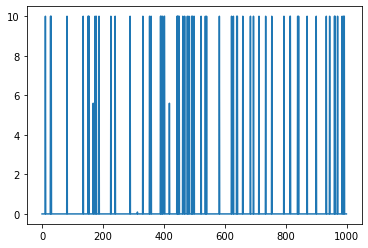

In [4]:
plt.plot(sol['x'])

Text(0.5, 1.0, 'XOR data')

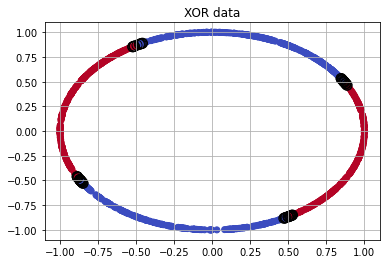

In [5]:
svi = (np.array(sol['x'])>=np.mean(np.array(sol['x']), axis=0)).reshape(-1)
plt.scatter(XOR_X[:,0], XOR_X[:,1], c=XOR_rot_y, cmap=plt.cm.coolwarm)
plt.scatter(XOR_X[svi,0], XOR_X[svi,1], s=100, linewidth=1.0, facecolors='none', edgecolors='k')
plt.grid()
plt.title('XOR data')

In [6]:
np.ravel(sol['x'])

array([1.44308199e-09, 1.54923595e-09, 1.96850667e-09, 1.46337312e-09,
       1.01007683e-09, 2.29794040e-09, 1.10905223e-09, 1.40720399e-09,
       1.71407163e-09, 2.56514400e-09, 1.52907401e-09, 9.99999999e+00,
       4.42014647e-09, 1.29093158e-09, 1.67340182e-09, 1.79387775e-09,
       9.96813049e-10, 1.33714765e-09, 6.72192834e-09, 1.28769155e-08,
       3.30499263e-09, 3.41384174e-09, 1.11934445e-09, 1.01509088e-09,
       4.12246191e-09, 9.74890556e-10, 9.56171357e-10, 1.93919484e-09,
       9.99999993e+00, 9.66751114e-10, 9.99999994e+00, 1.46660285e-09,
       7.28379529e-09, 2.76276039e-09, 9.64275143e-10, 9.60919731e-10,
       1.00254926e-09, 1.24317044e-09, 1.07095659e-09, 1.29095964e-09,
       2.29446025e-09, 1.04334254e-09, 1.41063625e-09, 1.08057764e-09,
       2.17143721e-09, 1.13525099e-09, 9.63117531e-10, 1.26115012e-09,
       9.64028900e-10, 1.92773337e-09, 9.93313795e-10, 3.02005604e-09,
       9.59163251e-10, 2.14724642e-09, 5.11481324e-09, 1.90751739e-09,
      

In [7]:
from classification.classifier import SVM
from classification.optimizer import QpDuel
linker = lambda X, Y: X@Y.T
cls = SVM(XOR_X, XOR_rot_y, kernel= 'power2')
cls.optimize(QpDuel, C=100, Probability=True)

pcost       dcost       gap    pres   dres
 0: -9.9984e-01 -1.0034e+05  2e+05  1e-02  5e-14
 1: -9.2311e-01 -1.1051e+03  2e+03  1e-04  2e-14
 2: -9.0412e-01 -9.4311e+01  1e+02  1e-06  2e-14
 3: -9.0414e-01 -2.3547e+00  1e+00  1e-08  3e-14
 4: -9.1594e-01 -1.1533e+00  2e-01  2e-09  5e-15
 5: -9.7556e-01 -1.1637e+00  2e-01  2e-10  7e-16
 6: -9.8985e-01 -1.0323e+00  4e-02  3e-11  1e-16
 7: -9.9522e-01 -1.0208e+00  3e-02  2e-12  2e-16
 8: -9.9883e-01 -1.0030e+00  4e-03  1e-13  1e-16
 9: -9.9972e-01 -1.0007e+00  9e-04  7e-15  2e-16
10: -9.9991e-01 -1.0002e+00  3e-04  1e-15  2e-16
11: -9.9998e-01 -1.0000e+00  5e-05  1e-15  2e-16
12: -9.9999e-01 -1.0000e+00  5e-06  4e-15  2e-16
13: -1.0000e+00 -1.0000e+00  5e-07  1e-15  2e-16
Optimal solution found.


In [8]:
matrix([1., 0.])

<2x1 matrix, tc='d'>

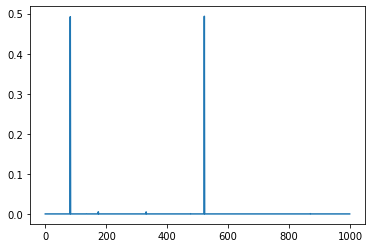

In [9]:
sol = cls.opt_dict
plt.plot(sol['x'])

In [10]:
svi = cls.support_vector_index
plt.scatter(XOR_X[:,0], XOR_X[:,1], c=XOR_rot_y, cmap=plt.cm.coolwarm)
plt.scatter(XOR_X[svi,0], XOR_X[svi,1], s=100, linewidth=1.0, facecolors='none', edgecolors='k')
plt.grid()
plt.title('XOR data')

Text(0.5, 1.0, 'XOR data')

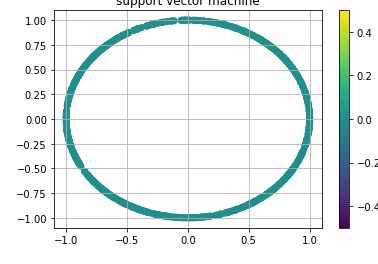

In [11]:
cls.plot()